In [2]:
##############################
## Part I: Performing Trim: ##
##############################
# Source: https://www.astropy.org/ccd-reduction-and-photometry-guide

from pathlib import Path
import os
from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np
from convenience_functions import show_image

PIXXMIT                        / Number of pixels returned per ADC go            [astropy.io.fits.card]
PIXXMIT                        / Number of pixels returned per ADC go           
PIXOFFST                       / Valid pixel offset within ADC go                [astropy.io.fits.card]
PIXOFFST                       / Valid pixel offset within ADC go               
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" contains multiple entries for "erase", the pair "erase=1" will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" co

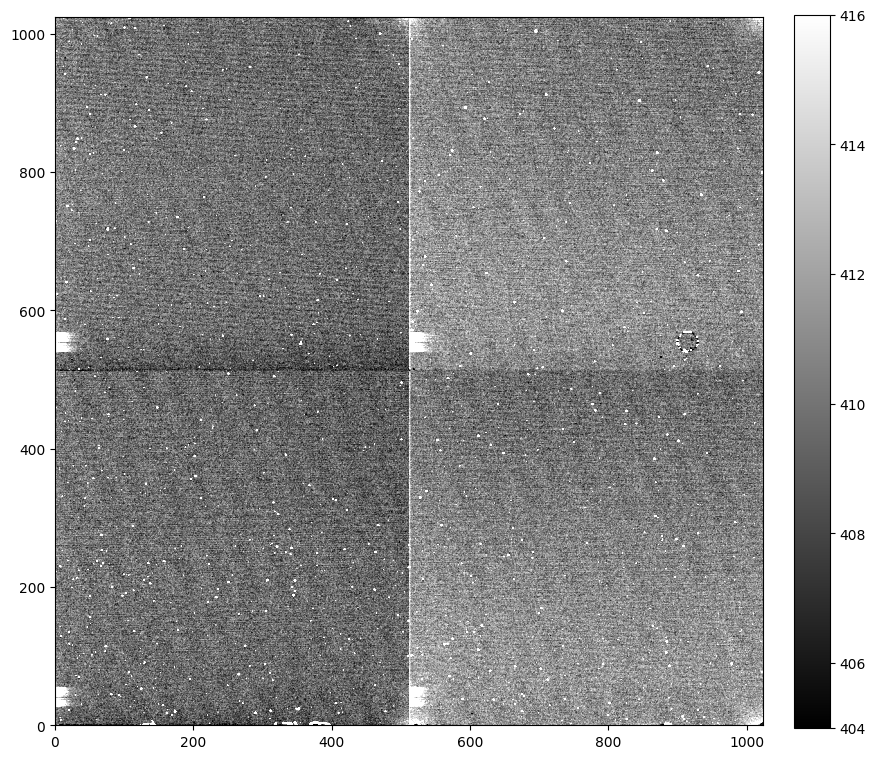

In [3]:

ppath = Path('/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data')
files = ccdp.ImageFileCollection(ppath)
raw_im = files.files_filtered(include_path=True, OBSTYPE='dark')
##Part II: Performing Trim 

### Veiwing a single file in order to decide about necessary trim dimentions:

first_im = CCDData.read(raw_im[0], unit='adu')
show_image(first_im.data, cmap='gray')

PIXXMIT                        / Number of pixels returned per ADC go            [astropy.io.fits.card]
PIXXMIT                        / Number of pixels returned per ADC go           
PIXOFFST                       / Valid pixel offset within ADC go                [astropy.io.fits.card]
PIXOFFST                       / Valid pixel offset within ADC go               
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" contains multiple entries for "erase", the pair "erase=1" will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" co

(800, 800)


Text(0.5, 1.0, 'Trimmed')

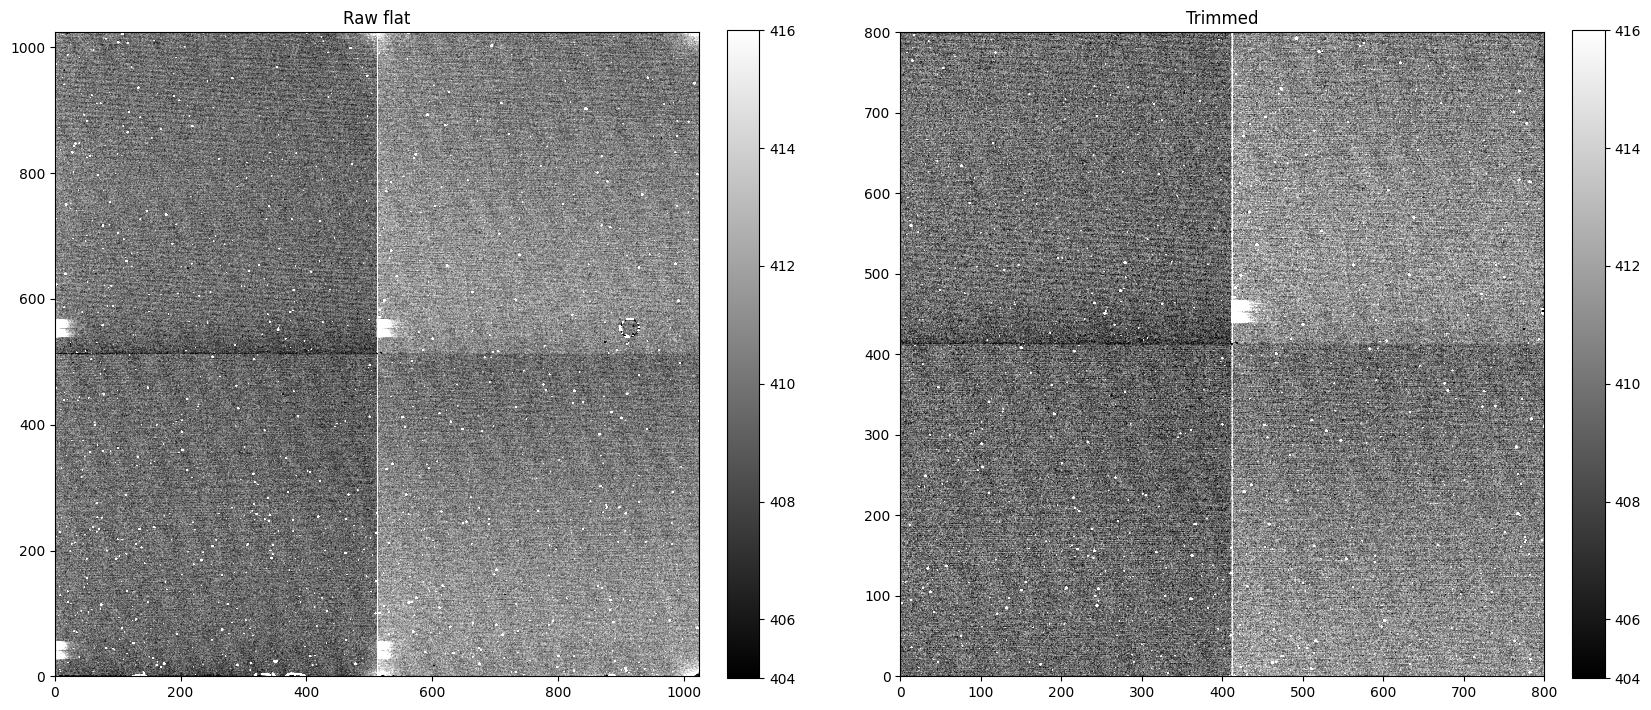

In [8]:
## specify the part you want to trim using this section

raw = files.files_filtered(include_path=True, OBSTYPE='dark')
first_file = CCDData.read(raw[0], unit='adu')


# Trim the image to the desired size
trimmed_file = ccdp.trim_image(first_file[100:900, 100:900])
print(trimmed_file.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
#plt.imshow(first_file.data,vmin=0,vmax=1000,origin='lower')
show_image(first_file.data, cmap='gray', ax=ax1, fig=fig)
ax1.set_title('Raw flat')
show_image(trimmed_file.data, cmap='gray', ax=ax2, fig=fig)
ax2.set_title('Trimmed')
#fig.savefig("IC10_flat1_Trimonly.png")


In [10]:
## Trim all files in a directory

# Just make sure to change the OBSTYPE='dark' for the kind of files you want to trim

input_path = Path('/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data')
output_path = Path('/Users/applestore/exo-observe/Data/WASP-12b-20150209/trim')

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)
# Find all OBJECT files
files = ccdp.ImageFileCollection(input_path)
raw_files = files.files_filtered(include_path=True, OBSTYPE='dark')

# Process each file
for raw_file in raw_files:
    image = CCDData.read(raw_file, unit='adu')

#    # Overscan subtraction
#    overscan_subtracted = ccdp.subtract_overscan(image, overscan=image[:, 100:1020], median=True)

    # Trimming
    trimmed = ccdp.trim_image(image[100:900, 100:900]) #v1
    
    # Create output filename
    output_filename = os.path.basename(raw_file).replace('.fit', '_Trim.fit')
    output_filepath = os.path.join(output_path, output_filename)

    # Save the trimmed image
    trimmed.write(output_filepath, overwrite=True)

PIXXMIT                        / Number of pixels returned per ADC go            [astropy.io.fits.card]
PIXXMIT                        / Number of pixels returned per ADC go           
PIXOFFST                       / Valid pixel offset within ADC go                [astropy.io.fits.card]
PIXOFFST                       / Valid pixel offset within ADC go               
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" contains multiple entries for "erase", the pair "erase=1" will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ccdproc/image_collection.py:548: UserWarning: Header from file "/Users/applestore/exo-observe/Data/WASP-12b-20150209/raw_data/0aee9e9bc1d99d8bebef76fdbb40530c_c13a_150212_073805_fri.fits" co